# HW Gene Expression Arrays

#### Riley Payung
#### Jason Kinser
#### CDS 411
#### September 30, 2020

In [17]:
import sys
sys.path.append('C:/Users/rcpay/Desktop/Fall 2020/CDS 411') # your path goes here
import pandas
import numpy as np
import marray
import matplotlib.pyplot as plt
%matplotlib inline

## NOTES
These questions use the file GSM151674.xls.  Please define your file name below. Use this defined variable in the problems below. PLEASE DON'T make me retype the location of the data file for every problem.

Be sure to use the RAW data which starts on row 1652.

In [18]:
fname = 'C:/Users/rcpay/Desktop/Fall 2020/CDS 411/data/GSM151674.xls'

## Problem 1
Read in the raw data intensities for Channel 1.  Compute and print the average of these values

In [19]:
# your code and numerical answer
data = pandas.read_excel(fname);
dv = data.values

ch1_int = dv[1650:1650+1600,8].astype(float)
ch1_avg = np.sum(ch1_int)/len(ch1_int)
print ("Average Intensity: %.2f" % (ch1_avg))

Average Intensity: 3792.37


## Problem 2
Steps:
1. Compute the average ($\mu$) and standard deviation ($\sigma$) for the channel 1 intensity.
1. Get the min and max values from channel 1 intensity data. These will be the limits in the horizontal axis of a plot you will create.
1. Using the equation below, plot a normal distribution (bell curve), where $x$ are values along the $x$-axis between min and max.
1. Get the average and standard deviation for channel 2 intensity.
1. Using the same equation and same horizontal axis limits, plot a normal distribution for this data, on the same graph as the channel 1 data.

$$ y = \exp \left(\frac{-(x-\mu)^2}{2 \sigma^2} \right)$$


Average Intensity: 3792.37
Intensity Std. Dev.: 3605.41
Maximum Intensity: 30836.36
Minimum Intensity: 734.50


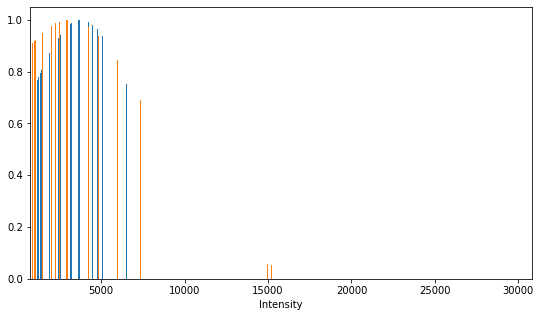

In [20]:
# your code and a plot with two curves
# AVERAGE INTENSITY WAS CALCULATED IN PROBLEM 1
print ("Average Intensity: %.2f" % (ch1_avg));
ch1_std = np.std(ch1_int);
print ("Intensity Std. Dev.: %.2f" % (ch1_std))

ch1_max = np.max(ch1_int);
ch1_min = np.min(ch1_int);
print ("Maximum Intensity: %.2f" % (ch1_max));
print ("Minimum Intensity: %.2f" % (ch1_min));
ch1_y = np.exp((-(ch1_int[:] - ch1_avg)**2)/(2 * ch1_std ** 2))

ch2_int = dv[1650:1650+1600,20].astype(float)
ch2_avg = np.sum(ch2_int)/len(ch2_int)
ch2_std = np.std(ch2_int);
ch2_y = np.exp((-(ch2_int[:] - ch2_avg)**2)/(2 * ch2_std ** 2))

plt.rcParams['figure.figsize'] = (9,5)
plt.bar(ch1_int, ch1_y);
plt.xlim(ch1_min,ch1_max);
plt.bar(ch2_int, ch2_y);
plt.xlabel("Intensity");
plt.show();

## Problem 3
How many rows of raw data have a larger value for the background than it does for the intensity (channel 1)?

In [21]:
# your code and a numerical answer

ch1_back = dv[1650:1650+1600,9].astype(float);
count = (ch1_back>ch1_int).nonzero()
print("Rows with a greater value for background than intensity:",len(count[0]))

Rows with a greater value for background than intensity: 9


## Problem 4
Compute c1b which is the channel 1 intensity minus the channel 1 background.  Compute c2b as the channel 2 intensity minus the channel 2 background.  Create a scatter plot of c2b vs c1b.

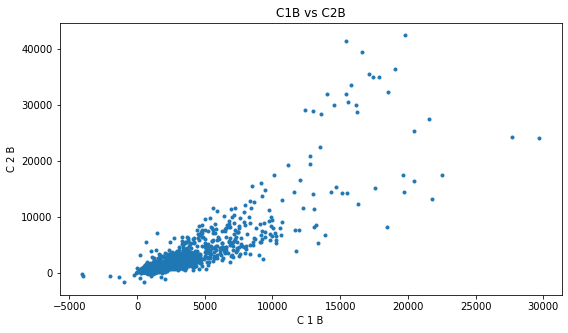

In [22]:
# your code and a scatter plot
ch2_back = dv[1650:1650+1600,21]

c1b = ch1_int - ch1_back;
c2b = ch2_int - ch2_back;

plt.scatter(c1b,c2b, marker=".")
plt.xlabel("C 1 B")
plt.ylabel("C 2 B")
plt.title("C1B vs C2B")
plt.show()

## Problem 5
Repeat Problem 4 but plot M vs A instead of R vs G.  You can modify the __NormGeneExp__ function to not use LOWESS and return A2 and M2.

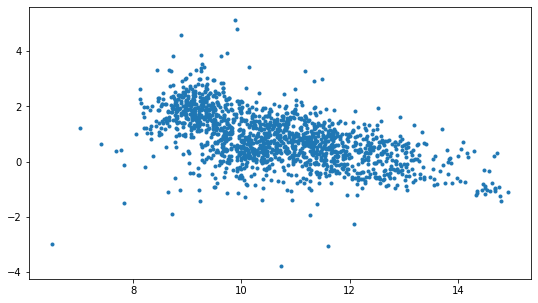

In [23]:
# your code and a scatter plot
def NormGeneExp(fname):
    data = pandas.read_excel(fname)
    dv = data.values
    ch1 = dv[1650:1650+1600,8] - dv[1650:1650+1600,9]
    ch2 = dv[1650:1650+1600,20] - dv[1650:1650+1600,21]
    glist = []
    for i in range(len(ch1)):
        if ch1[i] > 0 and ch2[i]>0:
            glist.append(( dv[i+1650,5],dv[i+1650,8],dv[i+1650,9],dv[i+1650,20], dv[i+1650,21],i))
    N = len(glist)
    ch1 = np.zeros(N)
    ch2 = np.zeros(N)
    i = 0
    for k in range(len(glist)):
        ch1[i] = glist[k][1]-glist[k][2]
        ch2[i] = glist[k][3]-glist[k][4]
        i += 1
    rgratio = ch1/ch2
    intensity = (ch1 + ch2)/2
    M = np.log2(rgratio.astype(float))
    A = np.log2(intensity.astype(float))
    return M,A

m,a = NormGeneExp(fname)
plt.scatter(a,m,marker=".")
plt.show()

## Problem 6
Plot the LOWESS curve on top of the data from Problem 5.  The result should be similar to Figure 9.6 from the textbook.

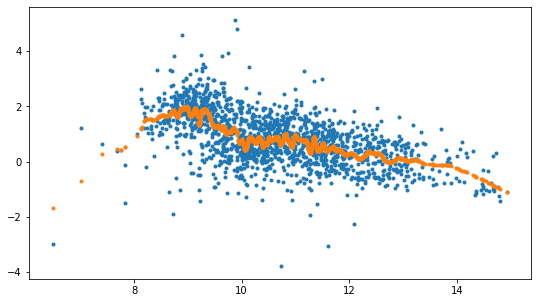

In [24]:
# your code and a scatter plot
from statsmodels.nonparametric.smoothers_lowess import lowess
def NormGeneExp2(fname):
    data = pandas.read_excel(fname)
    dv = data.values
    ch1 = dv[1650:1650+1600,8] - dv[1650:1650+1600,9]
    ch2 = dv[1650:1650+1600,20] - dv[1650:1650+1600,21]
    glist = []
    for i in range(len(ch1)):
        if ch1[i] > 0 and ch2[i]>0:
            glist.append(( dv[i+1650,5],dv[i+1650,8],dv[i+1650,9],dv[i+1650,20], dv[i+1650,21],i))
    N = len(glist)
    ch1 = np.zeros(N)
    ch2 = np.zeros(N)
    i = 0
    for k in range(len(glist)):
        ch1[i] = glist[k][1]-glist[k][2]
        ch2[i] = glist[k][3]-glist[k][4]
        i += 1
    rgratio = ch1/ch2
    intensity = (ch1 + ch2)/2
    M = np.log2(rgratio.astype(float))
    A = np.log2(intensity.astype(float))
    ag = A.argsort()
    A2 = A[ag]
    M2 = M[ag]
    filtered = lowess(M2,A2, is_sorted=True, frac=0.03125, it=0)
    return filtered;

filtered = NormGeneExp2(fname)
plt.scatter(a,m,marker=".");
plt.scatter(filtered[:,0],filtered[:,1],marker=".");
plt.show()

## Problem 7
Apply LOWESS normalization to the data from this file.  Basically, just run __NormGeneExp__.  Plot the output getting a result similar to Figure 9.7 in the textbook.

In [25]:
# your code and a scatter plot
yy,glists, A = marray.NormGeneExp(fname) 

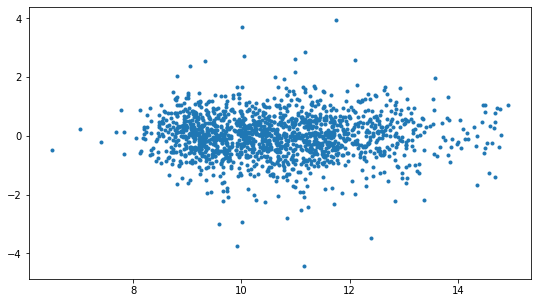

In [26]:
plt.scatter(A,yy,marker=".")
plt.show()